<a href="https://colab.research.google.com/github/Sharath670/Linear-Regression-Capstone-Proj-2-/blob/main/Capstone_Project_2(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Sharath670/Linear-Regression-Capstone-Proj-2-

# **Problem Statement**


**Rental bike services are very commonly used in cities across the world since they are cost effective and are easily accessible. From the perspective of the bike sharing companies, one of the main goals is to make sure that there are enough bikes available as per the demand. Predicting the demand for the bikes is crucial for the companies as it would prepeare them ahead of time and also make sure that the supply does not fall short.**

**In this project, I will create a Linear Regression model which can predict the demand for the bikes based on historical data.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
dataset=pd.read_csv('/content/drive/MyDrive/ALMA BETTER/SeoulBikeData.csv', encoding= 'unicode_escape')

### Dataset First View

In [5]:
# Dataset First Look
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()


0

#### Missing Values/Null Values

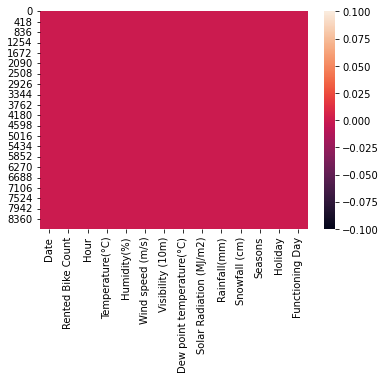

In [9]:
# Missing Values/Null Values Count
dataset.isna().sum()
sns.heatmap(dataset.isna())

### What did you know about your dataset?

This dataset contains data from a bike sharing company. This dataset shows us the characteristics of different days and also the amount of bikes rented per hour. 

This data can be used for forecasting the bike demand in the future.

This dataset has 8760 rows and 14 columns, it has no null values or duplicate values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description 

**Date** - Date

**Hour** - Hour of the day (0-23)

**Temperature** - Temperature of the day

**Humidity**- Humidity measure

**Windspeed** - Windspeed

**Visibility** - Visibility measure

**Dew Point Temperature** - Dew Point Temperature Measure

**Solar Radiation** - Solar Radiation Measure

**Rainfall** - Rainfall in mm

**Snowfall** - Snowfall measure

**Seasons** - 1= spring, 2= summer, 3= fall, 4 = winter

**Holiday** - Whether a holiday or not

**Functional Day** - Whether a functional day or not

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print("Number of unique values in ",i,"is",dataset[i].nunique())

Number of unique values in  Date is 365
Number of unique values in  Rented Bike Count is 2166
Number of unique values in  Hour is 24
Number of unique values in  Temperature(°C) is 546
Number of unique values in  Humidity(%) is 90
Number of unique values in  Wind speed (m/s) is 65
Number of unique values in  Visibility (10m) is 1789
Number of unique values in  Dew point temperature(°C) is 556
Number of unique values in  Solar Radiation (MJ/m2) is 345
Number of unique values in  Rainfall(mm) is 61
Number of unique values in  Snowfall (cm) is 51
Number of unique values in  Seasons is 4
Number of unique values in  Holiday is 2
Number of unique values in  Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.
df=dataset.copy()

In [14]:
#Average number of bikes rented per hour by season.
df.groupby('Seasons')['Rented Bike Count'].mean().sort_values(ascending=False).reset_index() 

,Seasons,Rented Bike Count
0,Summer,1034.073370
1,Autumn,819.597985
2,Spring,730.031250
3,Winter,225.541204


In [15]:
# Day which had the most number of bikes rented
df.groupby('Date')['Rented Bike Count'].sum().sort_values(ascending=False)[0:10].reset_index()

,Date,Rented Bike Count
0,13/06/2018,36149
1,19/06/2018,35349
2,08/06/2018,35103
3,20/06/2018,34639
4,21/06/2018,34621
5,12/06/2018,34544
6,16/06/2018,34360
7,22/06/2018,34079
8,06/07/2018,33676
9,15/06/2018,33492


In [16]:
# Which temperature do most people prefer riding bikes in?
df.groupby('Temperature(°C)')['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()[0:10]

,Temperature(°C),Rented Bike Count
0,23.4,45078
1,24.2,42243
2,25.0,39936
3,19.1,38835
4,20.6,38398
5,28.2,36940
6,27.8,35979
7,24.6,35858
8,20.7,35562
9,22.2,35478


In [17]:
#Extracting month from date to create a new column called month
df['month']=df['Date'].apply(lambda x: x[3:5])

In [76]:
#Extracting year from date to create a new column called year
df['year']=df['Date'].apply(lambda x: x[6:10])


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,2017


In [19]:
# Finding out which month has the highest number of Bikes rented
df.groupby('month')['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()

,month,Rented Bike Count
0,06,896887
1,07,734460
2,05,707088
3,09,673612
4,08,651887
5,10,650675
6,04,524227
7,11,465715
8,03,380594
9,12,185330


In [20]:
# Checking if more bikes are rented on holidays or non holidays
df.groupby('Holiday')['Rented Bike Count'].sum()



Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

In [21]:
# Percentage of bikes rented on non holidays 
(df.groupby('Holiday')['Rented Bike Count'].sum()[0]/df['Rented Bike Count'].sum())*100

3.497796774435001

In [22]:
# At what humidity percentage do people prefer to ride bikes?
df.groupby('Humidity(%)')['Rented Bike Count'].sum().sort_values(ascending=False)[0:10].reset_index()

,Humidity(%),Rented Bike Count
0,43,141773
1,53,140725
2,47,138105
3,56,134711
4,51,131966
5,52,130054
6,55,129240
7,44,126969
8,45,126234
9,54,123762


In [23]:
# Finding out the preferred humidity and temperature for bike riding
df.groupby(['Humidity(%)','Temperature(°C)'])['Rented Bike Count'].sum().sort_values(ascending=False)[0:10].reset_index()

,Humidity(%),Temperature(°C),Rented Bike Count
0,43,28.4,8201
1,43,25.5,6494
2,41,27.8,6280
3,49,26.9,6002
4,57,25.6,5885
5,49,23.7,5747
6,38,23.4,5605
7,67,22.8,5513
8,66,20.5,5431
9,51,22.6,5371


In [24]:
#Visibility in which people prefer to ride bikes
df.groupby('Visibility (10m)')['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()[0:5]

,Visibility (10m),Rented Bike Count
0,2000,1836690
1,1995,26276
2,1989,22383
3,1987,21544
4,1992,21405


In [25]:
df.groupby('Seasons')['Visibility (10m)'].mean().sort_values(ascending=False).reset_index()

,Seasons,Visibility (10m)
0,Autumn,1560.752289
1,Summer,1501.745471
2,Winter,1445.987037
3,Spring,1240.364583


### What all manipulations have you done and insights you found?

**Column creation**

I created a column called 'months' by taking the month value from the Date column using the lambda function and used the new column for further analysis.

I also created a column called 'year' by taking the year values from the date column.

I also created a copy of my original dataset.

**Insights found.**

1. People mostly prefer to ride bikes during the summer season and very low number of people prefer riding during the season of winter.

2.  13th of June had the most number of bikes rented since people prefer riding in the sumer vacations.

3. 23.4°C is the most preferred temperature for bike riding.

4. The month of June has the highest number of bike rentals whereas the month of January has the least.

5. Most number of bikes are rented when there is no holiday.

6. Only 3.5 percent of bikes were rented during holidays

7. 43% humidity is the humidity level which had the most bike rentals.

8. The preferred humidity along with temperature value for bike riding is is 43% and 28.4 degree.

9. Most people ride bikes when the visibility level is 2000.

10. Autumn has the highest average visibility.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 ( Univariate)

Histogram of Rented Bike Count

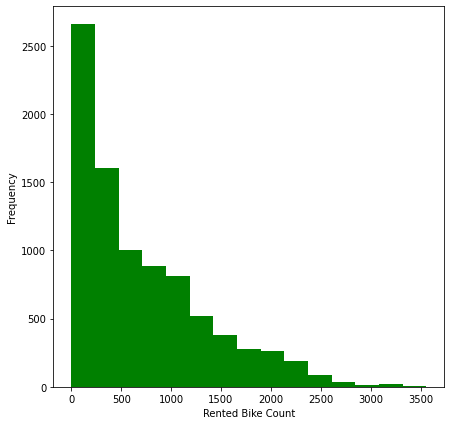

In [26]:
# Chart - 1 visualization code
plt.figure(figsize=(7, 7))
plt.hist(df['Rented Bike Count'],bins=15,color='green')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows us the count of values that lie in different ranges. It is used to represent numerical data and is commonly used for performing univariate analysis.

##### 2. What is/are the insight(s) found from the chart?

From the chart, I can see that the frequency of 0-250 bikes being rented is the highest whereas there is very less frequencty of 3500+ bikes being rented in an hour.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Through this insight, the business should make sure that there are atleast 250 bikes available during all hours of the day, to meet the demand by the customers.

#### Chart - 2 (Bivariate)
Bar chart of Hour vs Rented Bike Count

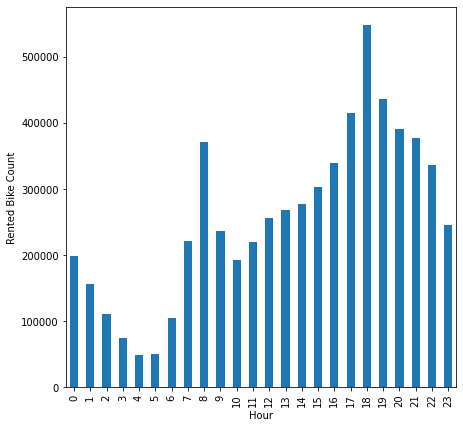

In [27]:
# Chart - 2 visualization code
plt.figure(figsize=(7, 7))
df.groupby('Hour')['Rented Bike Count'].sum().plot.bar()
plt.ylabel("Rented Bike Count")
plt.show()

##### 1. Why did you pick the specific chart?

I used a bar chart since it is useful to represent categorical data, where the hight of the rectangular bars are proportional to the amount on the Y axis. Here, I plotted the 'Hour' variable on x axis and the sum of the bikes rented for each hour on the y axis.

##### 2. What is/are the insight(s) found from the chart?

From the chart, I can see that most bikes are rented at hour number 18, that is 6pm followed by hour number 19, that is 7pm. These are the times when people leave their office.
In the mornings, most bikes are rented at 8am, this is the time where most people go to work, hence the high amount.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Looking at the chart, the company must make sure that there are enough bikes available during the peak times. They can also add extra bikes at the peak times to keep up with the demand and not lose out on customers. 

#### Chart - 3 (Bivariate)
Scatter plot of Temperature vs Rented Bike Count

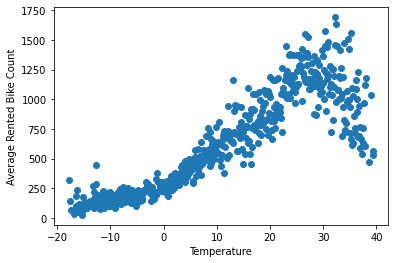

In [28]:
# Chart - 3 visualization code
q=df.groupby('Temperature(°C)')['Rented Bike Count'].mean().reset_index()
plt.scatter(x=q['Temperature(°C)'], y=q['Rented Bike Count'])
plt.xlabel('Temperature')
plt.ylabel('Average Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatterplot which is commonly used to represent bivariate data.Through a scatterplot, we can also see how one variable affects the other. We can use this to come to certain conclusions about how the variables are related. 

##### 2. What is/are the insight(s) found from the chart?

From this scatterplot I can see that there is a relationship between Average Rented Bike Count and Temperature. As the temperature increases, the number of bikes rented increases, but it starts decreasing towards the end as the temperature gets too high.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company can understand that people prefer to use their vehicles mostly when the weather is pleasant, not to cold or not too hot.
They can schedule the bike maintainance, replacement etc when the temperatures are too high or too low, since very few people use the bikes during those times.

#### Chart - 4 (Bivariate)
Pie chart of percentage of bookings across months

In [29]:
# Chart - 4 visualization code
q=df.groupby('month')['Rented Bike Count'].sum().reset_index()
w=q.iloc[:,1]
e=q.iloc[:,0]



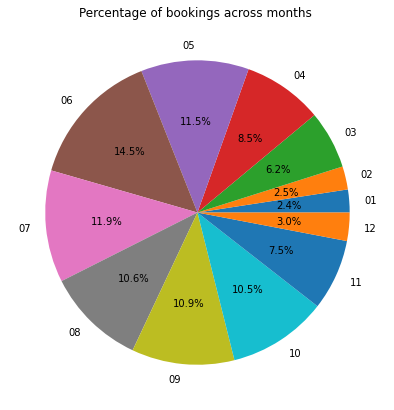

In [30]:
plt.figure(figsize=(7, 7))
plt.pie(w, labels = e,autopct='%1.1f%%')
plt.title('Percentage of bookings across months ')
plt.show()

##### 1. Why did you pick the specific chart?

I used a pie chart for this visualization to clearly show the percentage of bike bookings across months.

A pie chart is a very simple visualization and easy to understand since different variables are represented using sectors that have different colours.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that there are a high number of bike rentals during the month of June, this could be due to the fact that it is summer time. There is a very low number of bookings during the months of December, January and February. This could be due to the fact that those are the winter months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Using this insight, the company can roll out extra bikes during the summer months since that is the peak, and can decrease the number of bikes available during the winter months, which can help to cut costs.

#### Chart - 5 (Bivariate)
Barplot of Seasons vs Rented Bike Count

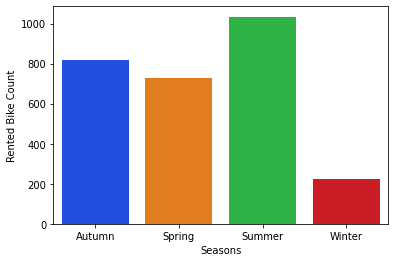

In [31]:
# Chart - 5 visualization code
q=df.groupby('Seasons')['Rented Bike Count'].mean().reset_index()
sns.set_palette("bright")
sns.barplot(x =q['Seasons'], y=q['Rented Bike Count'])
plt.show()

##### 1. Why did you pick the specific chart?

I chose a barchart from the seaborn library for this visualization. It can be used to represent categorical data and their corresponding values using rectangualar bars. Here, the different colours represent different seasons and the y axis represents the mean of the bike counts per hour.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that summer has the most number of bike rentals whereas winter has the least.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The company must focus on making sure that there are sufficient amount of bikes available in the month of summer, and can take back many of their bikes during the month of winter for cost cutting.

#### Chart - 6 (Bivariate)
Scatterplot of Visibility vs Rented Bike Count

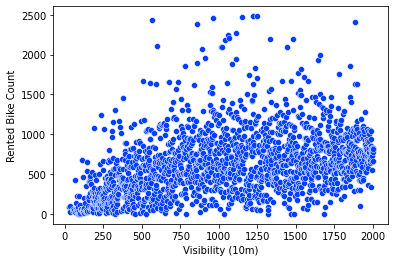

In [94]:
# Chart - 6 visualization code
q=df.groupby('Visibility (10m)')['Rented Bike Count'].mean().reset_index()
sns.scatterplot(x =q['Visibility (10m)'], y=q['Rented Bike Count'])
plt.show()


##### 1. Why did you pick the specific chart?

I used a scatterplot from the seaborn library for this particular visualization. Through a scatterplot, we can also see how one variable affects the other. We can use this to come to certain conclusions about how the variables are related

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that there is a slight increase in rented bike count as visibility increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The businesses can see the weather forecast and be ready to supply bikes when the visibility increases as the number of customers will increase as well.

#### Chart - 7 (Bivariate) 
Donut Chart of Holidays with mean of Rented Bike Count

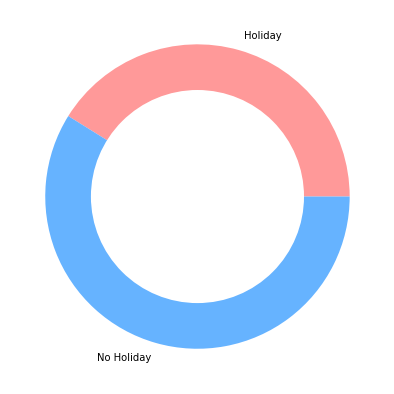

In [107]:
# Chart - 7 visualization code
plt.figure(figsize=(7,7))
q=df.groupby('Holiday')['Rented Bike Count'].mean().reset_index()
plt.pie(q['Rented Bike Count'], labels =q['Holiday'],colors=['#ff9999','#66b3ff'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 1. Why did you pick the specific chart?

A Donut chart is essentially a Pie Chart with an area of the center cut out. I have used it to visualize the number of bikes rented on holidays as compared to bikes rented on non holidays. 

##### 2. What is/are the insight(s) found from the chart?

I can see that, on average, more bikes are rented on non holidays as when compared to holidays, this could be due to the fact that people use bikes to commute to work on non holidays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Using information from the above chart, the company can make sure that there are sufficient bikes available during the week days, as week days have more demand than weekends.

#### Chart - 14 - Correlation Heatmap

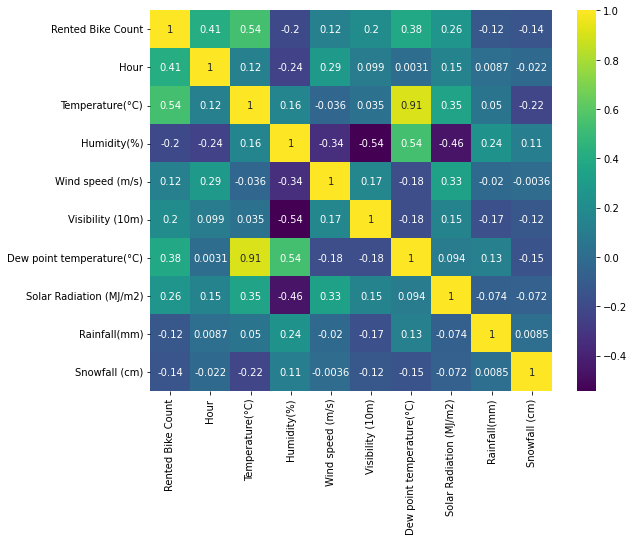

In [125]:
# Correlation Heatmap visualization code
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

##### 1. Why did you pick the specific chart?

I used a correlation heatmap

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [41]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [61]:
# Transform Your data

### 6. Data Scaling

In [62]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [63]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [65]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [71]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***